In [31]:
import requests_cache
import pandas_datareader.data as web

from datetime import datetime

session = requests_cache.CachedSession(cache_name='cache', backend='sqlite')

%env IEX_API_KEY=pk_36bd9794e5ab4cc1ab053a0e72466c3a

start = datetime(2020, 5, 22)
end = datetime(2020, 6, 5)

equity_data = web.DataReader('QQQ', 'iex', start, end, session=session)

import pandas as pd
equity_data.index = pd.to_datetime(equity_data.index)

env: IEX_API_KEY=pk_36bd9794e5ab4cc1ab053a0e72466c3a


In [32]:
import pandas as pd
import numpy as np

equity_data_signal = pd.DataFrame(index=equity_data.index)
equity_data_signal['price'] = equity_data['close']
equity_data_signal['daily_difference'] = equity_data_signal['price'].diff()
equity_data_signal['signal'] = 0.0
equity_data_signal['signal'][:] = np.where(equity_data_signal['daily_difference'][:] > 0, 1.0, 0.0)

equity_data_signal['positions'] = equity_data_signal['signal'].diff()

equity_data_signal

,price,daily_difference,signal,positions
date,,,,
2020-05-22,229.66,NaN,0.0,NaN
2020-05-26,229.04,-0.62,0.0,0.0
2020-05-27,230.29,1.25,1.0,1.0
2020-05-28,229.99,-0.30,0.0,-1.0
2020-05-29,233.36,3.37,1.0,1.0
2020-06-01,234.06,0.70,1.0,0.0
2020-06-02,235.63,1.57,1.0,0.0
2020-06-03,236.69,1.06,1.0,0.0
2020-06-04,235.03,-1.66,0.0,-1.0


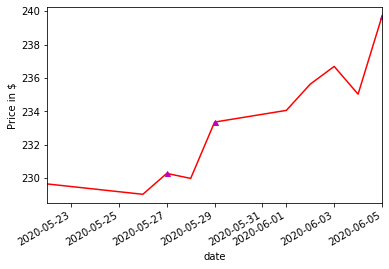

In [33]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='Price in $')
equity_data_signal['price'].plot(ax=ax1, color='r')

ax1.plot(equity_data_signal.price[equity_data_signal.positions == 1.0],
         '^', markersize=5, color='m')

ax1.plot(equity_data_signal.price[equity_data_signal.positions == -1.0],
         'v', markersize=5, color='k')

plt.show()